In [3]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from scipy.stats import mode
from astropy.io import ascii
from itertools import chain
from matplotlib.ticker import MultipleLocator
from scipy.signal import argrelextrema

In [4]:
# Master Darks
# 10 second master
dark_10s = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-10s/dark_.0000000{0}.DARK.FIT'.format(i))
    dark_10s.append(file[0].data)
    file.close() 
mdark_10s = np.empty(shape=dark_10s[0].shape)
for i in range(len(dark_10s[0])):
    for j in range(len(dark_10s[0][0])):
        med = []
        for file in dark_10s:
            med.append(file[i][j])
        mdark_10s[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_10s).writeto('../Previous Data/masters/masterdark_10s.fits')
except OSError:
    print(mdark_10s)

# 30 seconds master
dark_30s = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-30s/dark_.0000001{0}.DARK.FIT'.format(i))
    dark_30s.append(file[0].data)
    file.close()
mdark_30s = np.empty(shape=dark_30s[0].shape)
for i in range(len(dark_30s[0])):
    for j in range(len(dark_30s[0][0])):
        med = []
        for file in dark_30s:
            med.append(file[i][j])
        mdark_30s[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_30s).writeto('../Previous Data/masters/masterdark_30s.fits')
except OSError:
    print(mdark_30s)
    
# 2 min master
dark_2m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-2min/dark_.0000002{0}.DARK.FIT'.format(i))
    dark_2m.append(file[0].data)
    file.close()
mdark_2m = np.empty(shape=dark_2m[0].shape)
for i in range(len(dark_2m[0])):
    for j in range(len(dark_2m[0][0])):
        med = []
        for file in dark_2m:
            med.append(file[i][j])
        mdark_2m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_2m).writeto('../Previous Data/masters/masterdark_2m.fits')
except OSError:
    print(mdark_2m)
    
# 3 min master
dark_3m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-3min/dark_.0000003{0}.DARK.FIT'.format(i))
    dark_3m.append(file[0].data)
    file.close()
mdark_3m = np.empty(shape=dark_3m[0].shape)
for i in range(len(dark_3m[0])):
    for j in range(len(dark_3m[0][0])):
        med = []
        for file in dark_3m:
            med.append(file[i][j])
        mdark_3m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_3m).writeto('../Previous Data/masters/masterdark_3m.fits')
except OSError:
    print(mdark_3m)
    
# 5 min master
dark_5m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-5min/dark_.0000004{0}.DARK.FIT'.format(i))
    dark_5m.append(file[0].data)
    file.close()
mdark_5m = np.empty(shape=dark_3m[0].shape)
for i in range(len(dark_5m[0])):
    for j in range(len(dark_5m[0][0])):
        med = []
        for file in dark_5m:
            med.append(file[i][j])
        mdark_5m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_5m).writeto('../Previous Data/masters/masterdark_5m.fits')
except OSError:
    print(mdark_5m)
    
#     
dark_10m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-10min/dark_.0000005{0}.DARK.FIT'.format(i))
    dark_10m.append(file[0].data)
    file.close()
mdark_10m = np.empty(shape=dark_10m[0].shape)
for i in range(len(dark_10m[0])):
    for j in range(len(dark_10m[0][0])):
        med = []
        for file in dark_10m:
            med.append(file[i][j])
        mdark_10m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_10m).writeto('../Previous Data/masterdark_5m.fits')
except OSError:
    print(mdark_10m)

[[8318. 8308. 8310. ... 8247. 8239. 8243.]
 [8311. 8317. 8320. ... 8240. 8238. 8237.]
 [8318. 8316. 8314. ... 8243. 8238. 8242.]
 ...
 [8318. 8306. 8321. ... 8232. 8229. 8230.]
 [8308. 8311. 8305. ... 8235. 8230. 8234.]
 [8304. 8325. 8312. ... 8237. 8237. 8241.]]
[[8314. 8323. 8315. ... 8239. 8246. 8237.]
 [8324. 8319. 8315. ... 8230. 8244. 8239.]
 [8327. 8321. 8316. ... 8240. 8242. 8243.]
 ...
 [8328. 8317. 8316. ... 8236. 8232. 8242.]
 [8317. 8316. 8302. ... 8242. 8235. 8240.]
 [8313. 8314. 8317. ... 8237. 8237. 8243.]]
[[8331. 8328. 8313. ... 8256. 8249. 8246.]
 [8332. 8325. 8325. ... 8240. 8260. 8240.]
 [8318. 8323. 8327. ... 8249. 8247. 8250.]
 ...
 [8320. 8317. 8321. ... 8246. 8240. 8255.]
 [8329. 8322. 8319. ... 8248. 8239. 8250.]
 [8324. 8327. 8326. ... 8239. 8253. 8243.]]
[[8336. 8339. 8328. ... 8260. 8256. 8251.]
 [8329. 8327. 8328. ... 8253. 8277. 8244.]
 [8330. 8340. 8333. ... 8250. 8247. 8249.]
 ...
 [8326. 8329. 8327. ... 8252. 8250. 8253.]
 [8339. 8330. 8324. ... 8252. 8

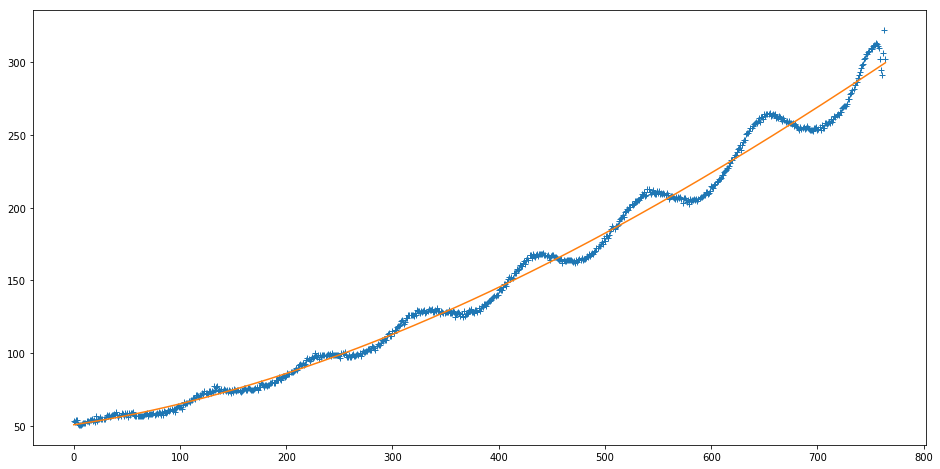

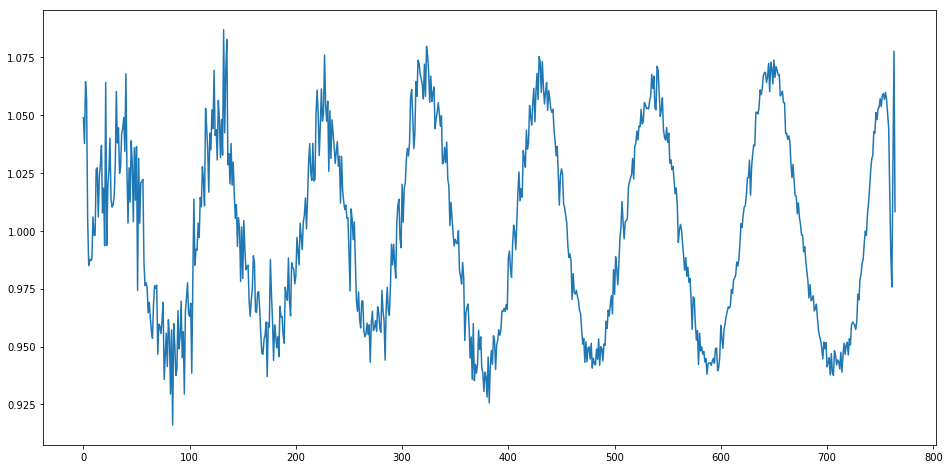

In [6]:
# getting 10 flat field images
def file_name(file_dir):
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.FIT':
                L.append(os.path.join(root, file))
    return L
flatnames=file_name('../Previous Data/flat_dome/')
flats=[]
flatsdata=[]
for i in range(len(flatnames)):
    flats.append(i)
    flatsdata.append(i)
    flats[i]=fits.open(flatnames[i])
    flatsdata[i]=flats[i][0].data

sum_flat=np.zeros(shape=(255,765))
for i in range(len(flatsdata)):
    sum_flat += flatsdata[i]
m_flat=(sum_flat[40:99]/10-mdark_30s[40:99]) #apply dark and cut the the slit part only
avgcounts_fl=np.mean(m_flat,axis=0) #average counts for each column(wl)
pix_pos=np.array([i for i in range(765)])
plt.figure(figsize=(16,8))
plt.plot(pix_pos,avgcounts_fl,'+',label='data point')
fit=np.poly1d(np.polyfit(pix_pos,avgcounts_fl,3))
plt.plot(pix_pos,fit(pix_pos),label='fit')
m_flat_norm=avgcounts_fl/fit(pix_pos)
plt.figure(figsize=(16,8))
plt.plot(pix_pos,m_flat_norm)


In [47]:
m_flat_norm.shape

(765,)

(32, 765)


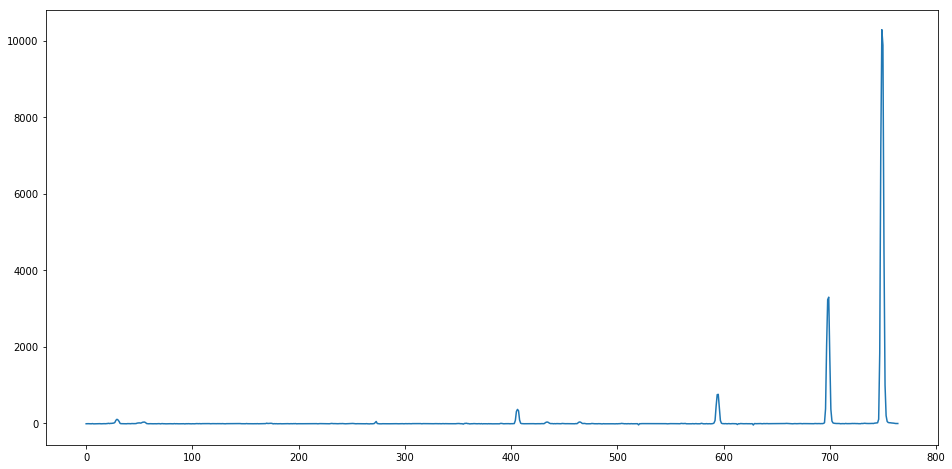

In [56]:
# getting science images of nebula
nebnames=file_name('../Previous Data/data_nebula/')
nebs=[]
nebsdata=[]
for i in range(len(nebnames)):
    nebs.append(i)
    nebsdata.append(i)
    nebs[i]=fits.open(nebnames[i])
    nebsdata[i]=nebs[i][0].data
#apply the master dark and flat
nebsprocessed=[]
for i in range(len(nebsdata)):
    nebsprocessed.append(i)
    nebsprocessed[i]=(nebsdata[i][40:72,:]-mdark_10m[40:72,:])/m_flat_norm

print(nebsprocessed[i].shape)
    
sum_neb=np.zeros(shape=(32,765))
for i in range(len(nebsprocessed)):
    sum_neb += nebsprocessed[i] 
avgcounts_neb=np.mean(sum_neb,axis=0)/len(nebsprocessed)

plt.figure(figsize=(16,8))
plt.plot(pix_pos,avgcounts_neb)

In [90]:

avgcounts_neb.shape

(765,)

In [78]:
index_peak=argrelextrema(avgcounts_neb,np.greater,order=20)
index_peak

(array([ 29,  55,  83, 113, 144, 170, 197, 231, 273, 321, 358, 406, 434,
        465, 504, 531, 595, 659, 699, 749]),)

No handles with labels found to put in legend.


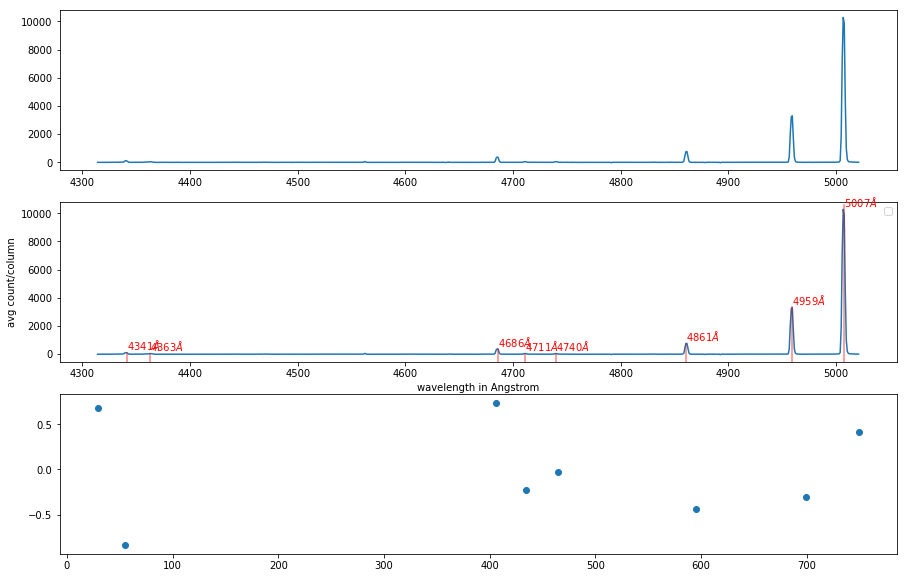

In [13]:
peak_pos=np.array([29,55,406,434,465,595,699,749])
wl=np.array([4341,4363,4686,4711,4740,4861,4959,5007])
wl_cali_fit=np.polyfit(peak_pos,wl,2)
secorder=np.poly1d(wl_cali_fit)
exp_wl=secorder(pix_pos)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(exp_wl,avgcounts_neb)
#labely=np.array([6000,6000,6000,6000,6000,6000,6000,6000])
ax2.plot(exp_wl,avgcounts_neb)
for i in range(len(wl)):
    ax2.axvline(x=wl[i], ymin=0, ymax=(avgcounts_neb[peak_pos[i]]+500)/11000,c='r',alpha=0.5)
    ax2.text(wl[i],avgcounts_neb[peak_pos[i]]+200,str(int(wl[i]))+'$\AA$',color='r')
ax2.set_xlabel('wavelength in Angstrom')
ax2.set_ylabel('avg count/column')
ax2.legend()

ax3.scatter(peak_pos,wl-secorder(peak_pos))
#ax3.plot(pix_pos,exp_wl)

##### Description of what is going on below
for the spec of star range [65:84,:]

(19, 765)


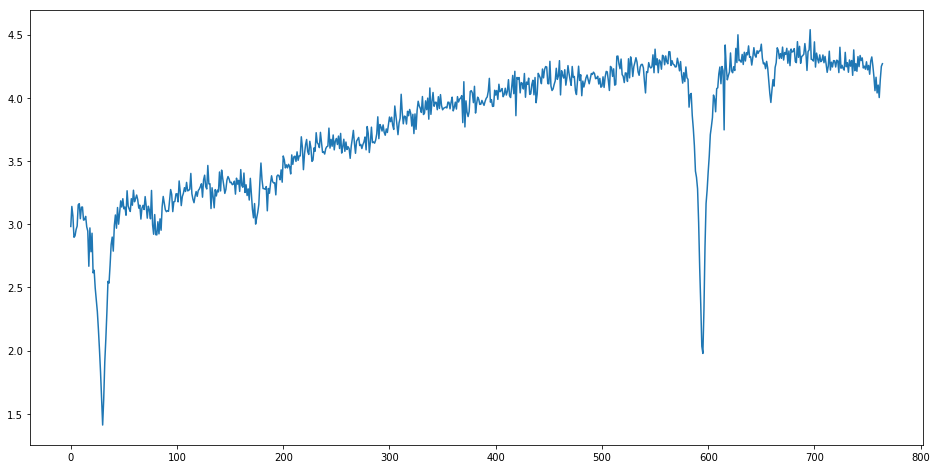

In [67]:
# getting science images of reference star
ref=file_name('../Previous Data/data_ref_star/')
refstardata=[]
refstarhead=[]
for i in range(len(ref)):
    refstardata.append(i)
    refstarhead.append(i)
    refstardata[i],refstarhead[i]=fits.getdata(ref[i],0,header=True)

# We don't use ref[0] & ref[7] because they're no good
# applying master dark and flat to science image with corresponding exposure time
# store master darks such that the exposure time corresponds to the file in ref list
mdarks=[mdark_5m,mdark_3m,mdark_3m,mdark_3m,mdark_3m,mdark_10s,mdark_30s,mdark_3m,mdark_2m]
exptime=[300,180,180,180,180,10,30,180,120]

refstartemp=[]
refstarcalib=[]
background=[]
mean_bg=[]
mean_bg_slit=np.ones(shape=(19,765))
mean_bg_slit_series=[mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit]
for i in range(len(refstardata)):
    refstarcalib.append(i)
    refstartemp.append(i)
    background.append(i)
    mean_bg.append(i)
    temp_refstar.append(i)
    refstartemp[i]=(refstardata[i]-mdarks[i])/m_flat_norm
    background[i]=refstartemp[i][40:64,:]       # width of spectrum[40:99]--> background[40:64]
    mean_bg[i]=np.mean(background[i])
    mean_bg_slit_series[i]=mean_bg_slit_series[i]*mean_bg[i]       # create artificial slit consists of mean background
    refstarcalib[i]=(refstartemp[i][65:84,:]-mean_bg_slit_series[i])/exptime[i] # subtract background from og and divide by exptime
    
sum_refstar=np.zeros(shape=(19,765))
for i in range(len(refstarcalib)):
    if i != 0 and i !=7:
        sum_refstar += refstarcalib[i]
    msum_refstar = sum_refstar/7
    refstar_1d = np.sum(msum_refstar,axis=0)/15

    
plt.figure(figsize=(16,8))
plt.plot(pix_pos,refstar_1d)


In [58]:
ref

['../Previous Data/data_ref_star/data_.00000008.FIT',
 '../Previous Data/data_ref_star/data_.00000006.FIT',
 '../Previous Data/data_ref_star/data_.00000007.FIT',
 '../Previous Data/data_ref_star/data_.00000005.FIT',
 '../Previous Data/data_ref_star/data_.00000004.FIT',
 '../Previous Data/data_ref_star/data_.00000000.FIT',
 '../Previous Data/data_ref_star/data_.00000001.FIT',
 '../Previous Data/data_ref_star/data_.00000003.FIT',
 '../Previous Data/data_ref_star/data_.00000002.FIT']